In [249]:
#https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

import os

## Time Series Analysis 

A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.

A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


Components of a Time-Series

* Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
* Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
* Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
* Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
* ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

We have pooled data - which is a collection of the observations of the values of variables recorded at different points in time for several variables. Here, we are looking at stocks and cryptocurrencies

In [250]:
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68


Let us look at the average/mean daily closing price of the selected stocks

In [251]:
tickers = [
 'MSFT',
 'AAPL', 
 'Visa', 
 'JPM',
 'UNH', 
 'WMT',
 'JNJ',
 'PG', 
 'HD', 
 'MRK',
 'CVX',
 'CRM',
 'KO',
 'MCD', 
 'CSCO',
 'INTC',
 'DIS',
 'VZ',
 'AMGN', 
 'IBM',
 'CAT',
 'NKE',
 'AXP', 
 'HON',
 'BA',
 'GS',
 'MMM', 
 'TRV',
 'TSLA',
 'WBA'] 

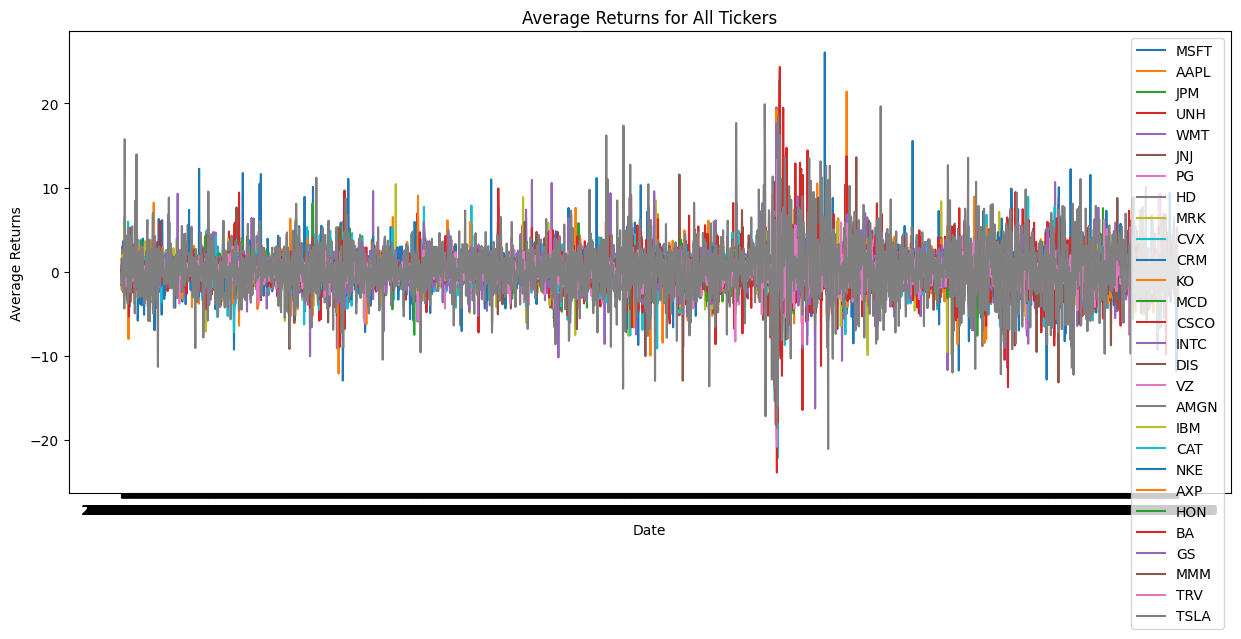

In [364]:
#Visualizing the time series

average_closing_prices = df.groupby('date')['pct_return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
for ticker in tickers:
    if ticker in df['ticker'].unique():
        plt.plot(average_closing_prices.index, df[df['ticker'] == ticker].groupby('date')['pct_return'].mean(), label=ticker)
plt.title('Average Returns for All Tickers')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

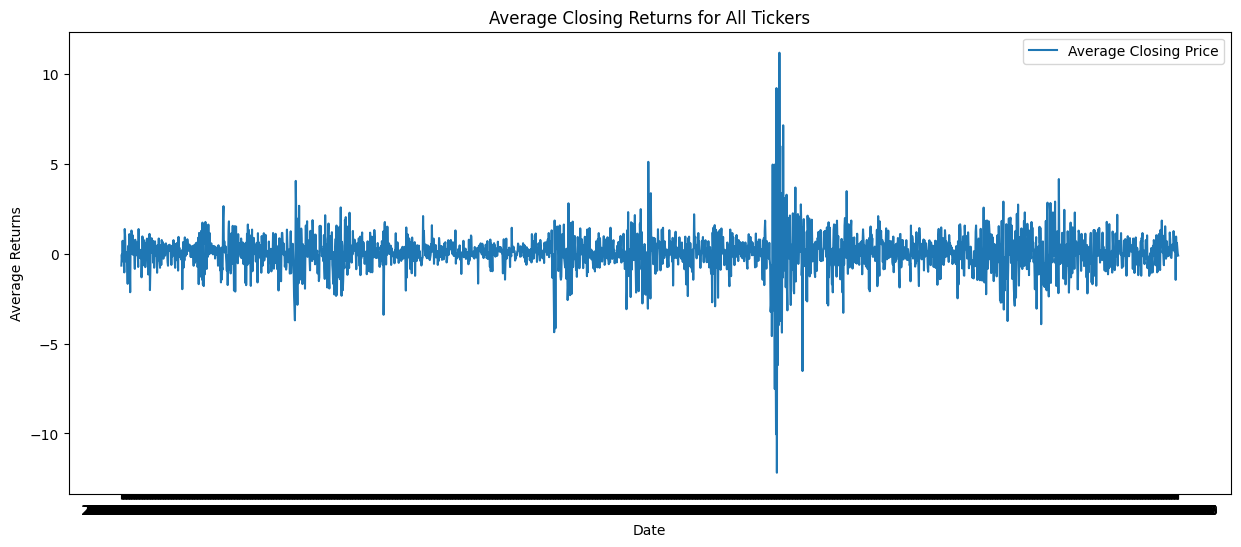

In [360]:
average_closing_price_per_day = df.groupby('date')['pct_return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_price_per_day.index, average_closing_price_per_day.values, label='Average Closing Price')
plt.title('Average Closing Returns for All Tickers')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()


#### Trend and Seasonality 

Taking the average returns across all of our tickers, we see that there is a clearly increased volatility during the COVID years. There is no clear large scale trend or seasonality otherwise that is visible as such in the average daily returns of the tickers. Taking a step back and looking at quarterly and monthly data might give us a better insight into trends and seasonality

## to try - check seasonality pre and post covid

### Linear Regression with Time Series

Conducting a time series regression using lag features. To make a lag feature we shift the observations of the target series so that they appear to have occured later in time. Here we've created a 1-step lag feature, though shifting by multiple steps is possible too.

Linear regression with a lag feature produces the model:
$$
\text{target} = \text{weight} \times \text{lag} + \text{bias}
$$
So lag features let us fit curves to lag plots where each observation in a series is plotted against the previous observation.

In [255]:
df.set_index('date', inplace=True)
df.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention
date,,,,,,,,,,,,
2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68


In [367]:
df['daily_volatility'] = df['price'] - df['open']
df.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility
date,,,,,,,,,,,,,
2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.15,-0.190
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,1.54,-0.290
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,2.24,-0.720
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,1.19,0.085
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,1.68,-0.240


In [368]:
df_lag = df.copy()
df_lag.index = pd.DatetimeIndex(df_lag.index)

df_lag['Lag_price'] = df_lag['price'].shift(1)
df_lag['Lag_attention'] = df_lag['name_price_attention'].shift(1)


In [369]:
df_lag.dropna(inplace=True) #removing the last value 

In [370]:
#Splitting the data to pre and post covid 

# Count high volatility points in pre-COVID and post-COVID periods


pre_covid_df = df_lag[df_lag.index < split_date]
post_covid_df = df_lag[df_lag.index >= split_date]


In [371]:
#trying one hot encoding 
split_date = '2020-01-01'


df_lag['Pre-covid'] = (df_lag.index < split_date).astype(int)
df_lag['Post-covid'] = (df_lag.index >= split_date).astype(int)

df_lag.head()

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility,Lag_price,Lag_attention,Pre-covid,Post-covid
date,,,,,,,,,,,,,,,,,
2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.910,306353000.0,-0.6728,1.54,-0.290,37.16,3.15,1,0
2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.500,299879000.0,-2.1133,2.24,-0.720,36.91,1.54,1,0
2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.350,302203000.0,0.7750,1.19,0.085,36.13,2.24,1,0
2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.860,296808000.0,-1.7852,1.68,-0.240,36.41,1.19,1,0
2014-01-09,10107,MSFT,35.53,36215226.0,-0.006432,35.91,35.40,35.880,35.655,294899000.0,-0.6432,3.50,-0.350,35.76,1.68,1,0


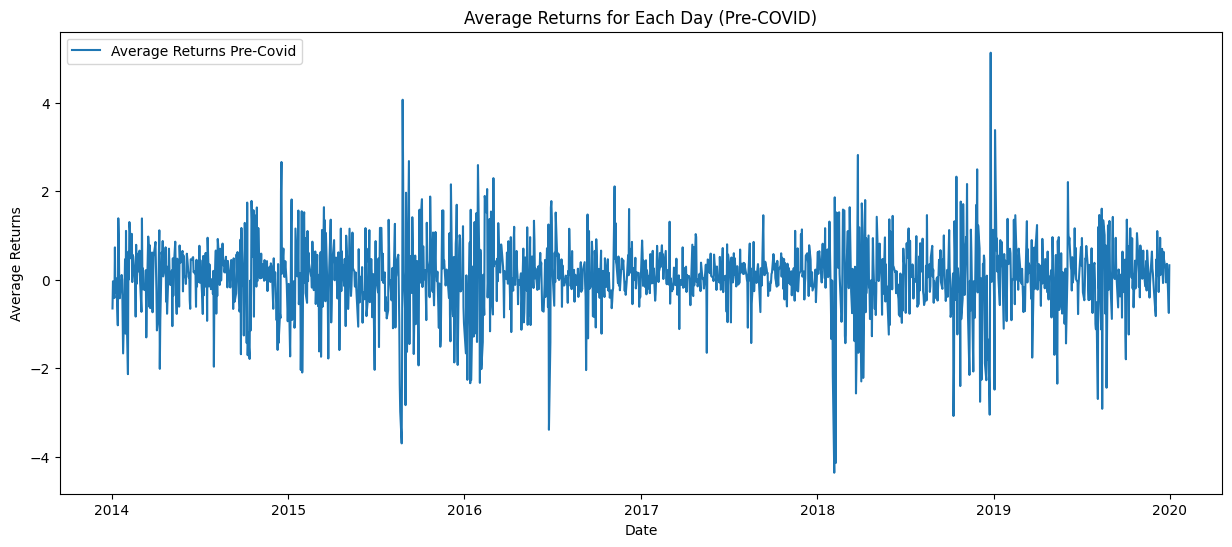

In [373]:
average_returns_pre_covid = df_lag[df_lag['Pre-covid'] == 1].groupby('date')['pct_return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

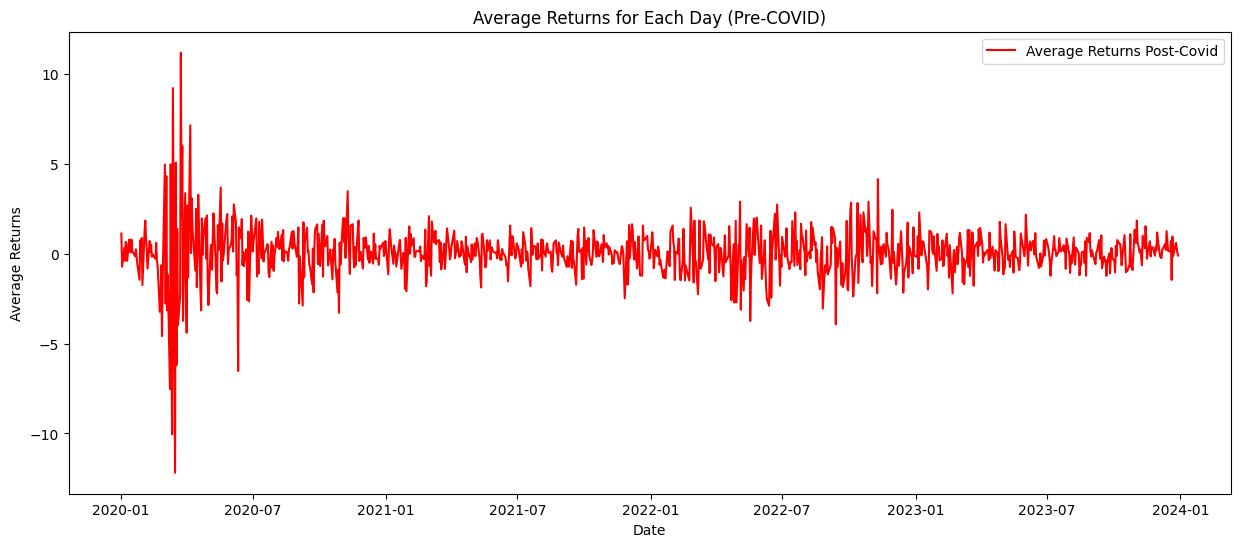

In [374]:
# Calculate average closing prices for each day
average_returns_post_covid = df_lag[df_lag['Post-covid'] == 1].groupby('date')['pct_return'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns Post-Covid',color='red')
plt.title('Average Returns for Each Day (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

### Putting them into one plot: 

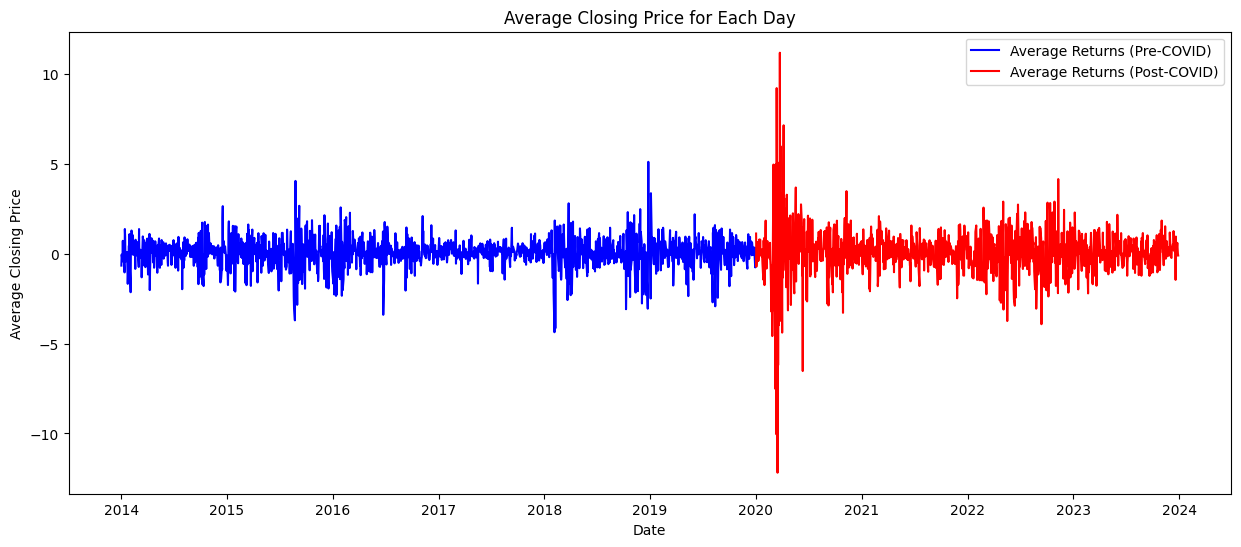

In [376]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns (Pre-COVID)', color='blue')
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns (Post-COVID)', color='red')
plt.title('Average Closing Price for Each Day')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


In [377]:
Min_max_pre = max(df_lag[df_lag['Pre-covid'] == 1].groupby('date')['pct_return'].mean()) - min(df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean())
print("The difference between the max average closing price and the minimum closing price before Covid was:",Min_max_pre)
Min_max_post = max(df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()) - min(df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean())
print("The difference between the max average closing price and the minimum closing price after Covid was:",Min_max_post)

The difference between the max average closing price and the minimum closing price before Covid was: -80.35567535714287
The difference between the max average closing price and the minimum closing price after Covid was: 120.99571535714284


In [268]:
pre_cov = df_lag[df_lag['Pre-covid'] == 1].groupby('date')['price'].mean()
post_cov = df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()
first_last_pre = pre_cov.iloc[-1] - pre_cov.iloc[0]
first_last_post = post_cov.iloc[-1] - post_cov.iloc[0]
print("The difference between the average closing price on Jan 1, 2014 and the average closing price on Dec 31, 2019 is:",first_last_pre)
print("The difference between the average closing price on Jan 1, 2020 and the average closing price on Dec 31, 2023 is:",first_last_post)


The difference between the average closing price on Jan 1, 2014 and the average closing price on Dec 31, 2019 is: 58.64055411375662
The difference between the average closing price on Jan 1, 2020 and the average closing price on Dec 31, 2023 is: 32.79035607142856


As we see clearly, there is a steady growth in the pre-covid average closing prices across all stocks as compared to post-covid where there is much more volatility. We can say that the average closing prices across our tickers trends upwards.

### Time Series for each industry

Taking the companies across each industry and seeing their pattern across time. 

In [378]:
industry_classification = {
    'AAPL': 'Technology', 
    'CRM': 'Technology', 
    'CSCO': 'Technology', 
    'IBM': 'Technology', 
    'INTC': 'Technology', 
    'MSFT': 'Technology', 
    'TSLA': 'Technology', 
    'AMGN': 'Healthcare', 
    'JNJ': 'Healthcare', 
    'MRK': 'Healthcare', 
    'UNH': 'Healthcare', 
    'AXP': 'Financial Services', 
    'GS': 'Financial Services', 
    'JPM': 'Financial Services', 
    'TRV': 'Financial Services', 
    'Visa': 'Financial Services', 
    'KO': 'Consumer Goods', 
    'MCD': 'Consumer Goods', 
    'NKE': 'Consumer Goods', 
    'WMT': 'Consumer Goods', 
    'BA': 'Industrial', 
    'CAT': 'Industrial', 
    'HD': 'Industrial', 
    'HON': 'Industrial', 
    'MMM': 'Industrial', 
    'CVX': 'Energy', 
    'VZ': 'Telecommunications', 
    'DIS': 'Entertainment'
}


In [380]:
df_lag['industry'] = df_lag['ticker'].map(industry_classification)

# Display the DataFrame with the added 'industry' column
df_lag


,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility,Lag_price,Lag_attention,Pre-covid,Post-covid,industry
date,,,,,,,,,,,,,,,,,,
2014-01-03,10107,MSFT,36.91000,30944370.0,-0.006728,37.22,36.60000,37.20000,36.910000,3.063530e+08,-0.6728,1.54,-0.29000,37.16000,3.15,1,0,Technology
2014-01-06,10107,MSFT,36.13000,43111355.0,-0.021133,36.89,36.11000,36.85000,36.500000,2.998790e+08,-2.1133,2.24,-0.72000,36.91000,1.54,1,0,Technology
2014-01-07,10107,MSFT,36.41000,35478667.0,0.007750,36.49,36.21000,36.32500,36.350000,3.022030e+08,0.7750,1.19,0.08500,36.13000,2.24,1,0,Technology
2014-01-08,10107,MSFT,35.76000,59452427.0,-0.017852,36.14,35.58000,36.00000,35.860000,2.968080e+08,-1.7852,1.68,-0.24000,36.41000,1.19,1,0,Technology
2014-01-09,10107,MSFT,35.53000,36215226.0,-0.006432,35.91,35.40000,35.88000,35.655000,2.948990e+08,-0.6432,3.50,-0.35000,35.76000,1.68,1,0,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,93436,TSLA,252.53999,93148541.0,-0.007701,258.22,251.37000,256.76001,254.795000,8.028047e+08,-0.7701,34.65,-4.22002,254.50000,36.90,0,1,Technology
2023-12-26,93436,TSLA,256.60999,86700724.0,0.016116,257.97,252.91000,254.49001,255.440000,8.157429e+08,1.6116,36.00,2.11998,252.53999,34.65,0,1,Technology
2023-12-27,93436,TSLA,261.44000,106250779.0,0.018822,263.34,257.51999,258.35001,260.429995,8.310971e+08,1.8822,41.40,3.08999,256.60999,36.00,0,1,Technology


In [381]:
#average_closing_prices_post_covid = df_lag[df_lag['Post-covid'] == 1].groupby('date')['price'].mean()
average_returns_post_covid_by_industry = df_lag[df_lag['Post-covid'] == 1].groupby(['industry', 'date'])['pct_return'].mean()
average_returns_pre_covid_by_industry = df_lag[df_lag['Pre-covid'] == 1].groupby(['industry', 'date'])['pct_return'].mean()


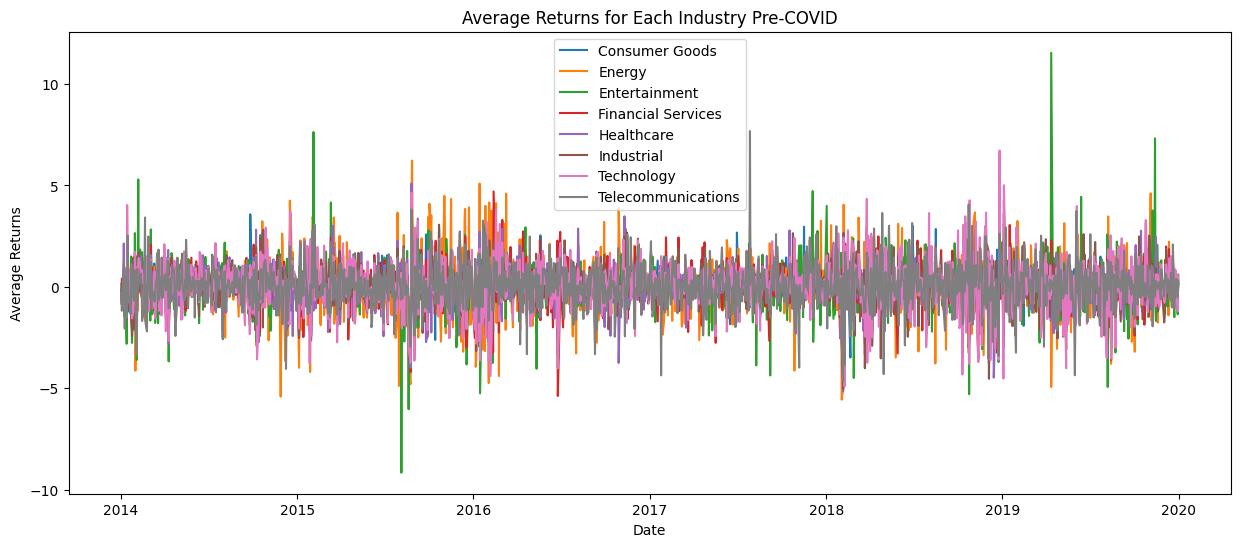

In [383]:
# Get unique industries
industries = average_returns_pre_covid_by_industry.index.get_level_values('industry').unique()

# Plotting
plt.figure(figsize=(15, 6))
for industry in industries:
    industry_data = average_returns_pre_covid_by_industry.loc[industry]
    plt.plot(industry_data.index, industry_data, label=industry)

plt.title('Average Returns for Each Industry Pre-COVID')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

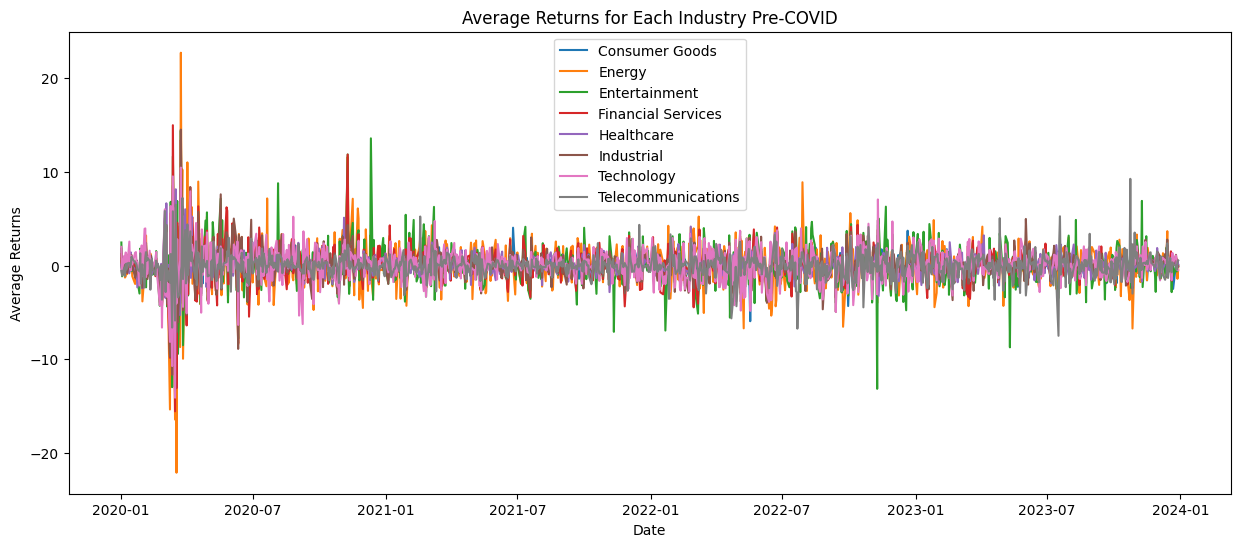

In [384]:
# Plotting
plt.figure(figsize=(15, 6))
for industry in industries:
    industry_data = average_returns_post_covid_by_industry.loc[industry]
    plt.plot(industry_data.index, industry_data, label=industry)

plt.title('Average Returns for Each Industry Pre-COVID')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

import pandas as pd

# Assuming df_lag is your DataFrame with lagged data

# Initialize lists to store results
industry_list = []
Min_max_pre_list = []
Min_max_post_list = []

# Iterate through each unique industry
for industry in df_lag['industry'].unique():
    # Filter data for the current industry
    industry_data = df_lag[df_lag['industry'] == industry]
    
    # Calculate Min_max_pre
    Min_max_pre = max(industry_data[industry_data['Pre-covid'] == 1].groupby('date')['price'].mean()) - min(industry_data[industry_data['Pre-covid'] == 1].groupby('date')['price'].mean())
    
    # Calculate Min_max_post
    Min_max_post = round(max(industry_data[industry_data['Post-covid'] == 1].groupby('date')['price'].mean()) - min(industry_data[industry_data['Post-covid'] == 1].groupby('date')['price'].mean()),3)
    
    # Append results to lists
    industry_list.append(industry)
    Min_max_pre_list.append(Min_max_pre)
    Min_max_post_list.append(Min_max_post)

# Create a DataFrame to store the results
industry_results_df = pd.DataFrame({
    'Industry': industry_list,
    'Pre-Covid Min-Max': Min_max_pre_list,
    'Post-Covid Min-Max': Min_max_post_list
})

# Print the DataFrame
industry_results_df['difference'] = round(industry_results_df['Post-Covid Min-Max'] - industry_results_df['Pre-Covid Min-Max'],3)
industry_results_df

To do: 

CHANGE CLOSING PRCIE TO PCT_RETURN

1. Do quarterly data - take average of that quarter
2. compare price and attention trends, see if that can be done in a single plot for:
    * total/all stocks - pre and post
    * each industry - pre and post



In [385]:
df_lag

,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,name_price_attention,daily_volatility,Lag_price,Lag_attention,Pre-covid,Post-covid,industry
date,,,,,,,,,,,,,,,,,,
2014-01-03,10107,MSFT,36.91000,30944370.0,-0.006728,37.22,36.60000,37.20000,36.910000,3.063530e+08,-0.6728,1.54,-0.29000,37.16000,3.15,1,0,Technology
2014-01-06,10107,MSFT,36.13000,43111355.0,-0.021133,36.89,36.11000,36.85000,36.500000,2.998790e+08,-2.1133,2.24,-0.72000,36.91000,1.54,1,0,Technology
2014-01-07,10107,MSFT,36.41000,35478667.0,0.007750,36.49,36.21000,36.32500,36.350000,3.022030e+08,0.7750,1.19,0.08500,36.13000,2.24,1,0,Technology
2014-01-08,10107,MSFT,35.76000,59452427.0,-0.017852,36.14,35.58000,36.00000,35.860000,2.968080e+08,-1.7852,1.68,-0.24000,36.41000,1.19,1,0,Technology
2014-01-09,10107,MSFT,35.53000,36215226.0,-0.006432,35.91,35.40000,35.88000,35.655000,2.948990e+08,-0.6432,3.50,-0.35000,35.76000,1.68,1,0,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,93436,TSLA,252.53999,93148541.0,-0.007701,258.22,251.37000,256.76001,254.795000,8.028047e+08,-0.7701,34.65,-4.22002,254.50000,36.90,0,1,Technology
2023-12-26,93436,TSLA,256.60999,86700724.0,0.016116,257.97,252.91000,254.49001,255.440000,8.157429e+08,1.6116,36.00,2.11998,252.53999,34.65,0,1,Technology
2023-12-27,93436,TSLA,261.44000,106250779.0,0.018822,263.34,257.51999,258.35001,260.429995,8.310971e+08,1.8822,41.40,3.08999,256.60999,36.00,0,1,Technology


In [343]:
#Quarterly Data
quarterly_values = pd.DataFrame()

quarterly_values['quarterly_returns']= df_lag.groupby('ticker')['pct_return'].resample('QS').mean()
quarterly_values['quarterly_attention']= df_lag.groupby('ticker')['name_price_attention'].resample('QS').mean()


quarterly_values.tail(10)

quarterly_returns  quarterly_attention
ticker date                                              
WMT    2021-07-01          -0.010181            22.975000
       2021-10-01           0.070813            21.401719
       2022-01-01           0.060027            18.881935
       2022-04-01          -0.296642            23.482742
       2022-07-01           0.123089            17.637187
       2022-10-01           0.157614            20.006032
       2023-01-01           0.074918            18.040968
       2023-04-01           0.111768            18.710645
       2023-07-01           0.036025            17.953333
       2023-10-01          -0.007822            18.161270

In [344]:
# Reset the index to make 'ticker' and 'date' regular columns
quarterly_values.reset_index(inplace=True)
quarterly_values['industry'] = quarterly_values['ticker'].map(industry_classification)

split_date = '2020-01-01'


quarterly_values['Pre-covid'] = (quarterly_values['date'] < split_date).astype(int)
quarterly_values['Post-covid'] = (quarterly_values['date']  >= split_date).astype(int)

quarterly_values


,ticker,date,quarterly_returns,quarterly_attention,industry,Pre-covid,Post-covid
0,AAPL,2014-01-01,-0.051803,5.501311,Technology,1,0
1,AAPL,2014-04-01,0.324160,6.330159,Technology,1,0
2,AAPL,2014-07-01,0.141947,10.169375,Technology,1,0
3,AAPL,2014-10-01,0.157844,11.987500,Technology,1,0
4,AAPL,2015-01-01,0.217938,9.569344,Technology,1,0
...,...,...,...,...,...,...,...
1115,WMT,2022-10-01,0.157614,20.006032,Consumer Goods,0,1
1116,WMT,2023-01-01,0.074918,18.040968,Consumer Goods,0,1
1117,WMT,2023-04-01,0.111768,18.710645,Consumer Goods,0,1
1118,WMT,2023-07-01,0.036025,17.953333,Consumer Goods,0,1


In [351]:
#Monthly Data
monthly_values = pd.DataFrame()

monthly_values['monthly_returns']= df_lag.groupby('ticker')['pct_return'].resample('MS').mean()
monthly_values['monthly_attention']= df_lag.groupby('ticker')['name_price_attention'].resample('MS').mean()


monthly_values.tail(10)

monthly_returns  monthly_attention
ticker date                                          
WMT    2023-03-01         0.180983          17.833043
       2023-04-01         0.126395          18.750000
       2023-05-01        -0.105786          16.863636
       2023-06-01         0.326448          20.610000
       2023-07-01         0.087575          18.240000
       2023-08-01         0.092778          17.115652
       2023-09-01        -0.080790          18.630000
       2023-10-01         0.101614          19.320000
       2023-11-01        -0.210986          16.906667
       2023-12-01         0.085120          18.204000

In [352]:
# Reset the index to make 'ticker' and 'date' regular columns
monthly_values.reset_index(inplace=True)
monthly_values['industry'] = monthly_values['ticker'].map(industry_classification)

split_date = '2020-01-01'


monthly_values['Pre-covid'] = (monthly_values['date'] < split_date).astype(int)
monthly_values['Post-covid'] = (monthly_values['date']  >= split_date).astype(int)

quarterly_values
monthly_values

,ticker,date,monthly_returns,monthly_attention,industry,Pre-covid,Post-covid
0,AAPL,2014-01-01,-0.518581,5.276190,Technology,1,0
1,AAPL,2014-02-01,0.300358,7.136842,Technology,1,0
2,AAPL,2014-03-01,0.096352,4.246667,Technology,1,0
3,AAPL,2014-04-01,0.473567,3.147619,Technology,1,0
4,AAPL,2014-05-01,0.365052,7.553333,Technology,1,0
...,...,...,...,...,...,...,...
3355,WMT,2023-08-01,0.092778,17.115652,Consumer Goods,0,1
3356,WMT,2023-09-01,-0.080790,18.630000,Consumer Goods,0,1
3357,WMT,2023-10-01,0.101614,19.320000,Consumer Goods,0,1
3358,WMT,2023-11-01,-0.210986,16.906667,Consumer Goods,0,1


### Visualization 

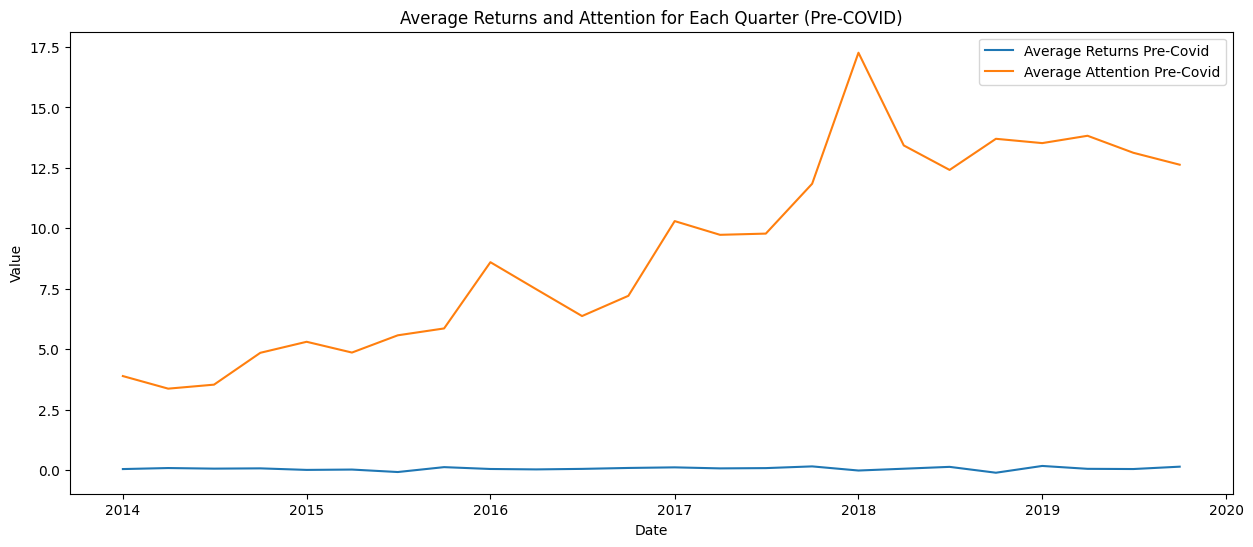

In [388]:
average_returns_pre_covid = quarterly_values[quarterly_values['Pre-covid'] == 1].groupby('date')['quarterly_returns'].mean()
average_attention_pre_covid = quarterly_values[quarterly_values['Pre-covid'] == 1].groupby('date')['quarterly_attention'].mean()
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid')
plt.plot(average_attention_pre_covid.index, average_attention_pre_covid, label='Average Attention Pre-Covid')

plt.title('Average Returns and Attention for Each Quarter (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

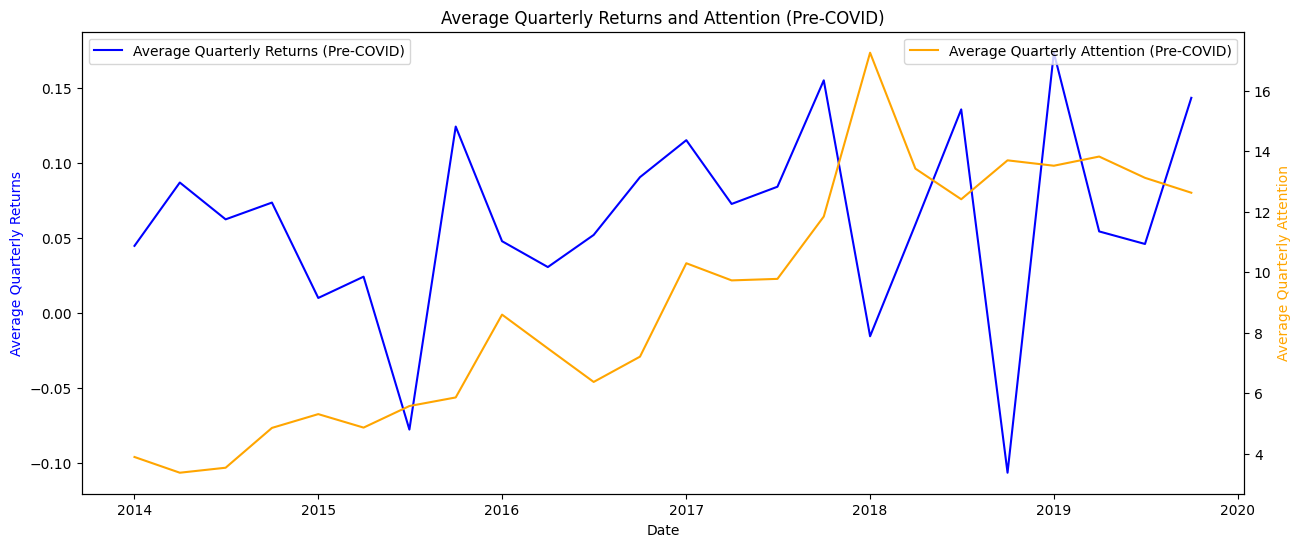

In [390]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Quarterly Returns (Pre-COVID)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Quarterly Returns', color='blue')

# Create a secondary y-axis for average quarterly attention
ax2 = ax1.twinx()
ax2.plot(average_attention_pre_covid.index, average_attention_pre_covid, label='Average Quarterly Attention (Pre-COVID)', color='orange')
ax2.set_ylabel('Average Quarterly Attention', color='orange')

# Add title and legend
plt.title('Average Quarterly Returns and Attention (Pre-COVID)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

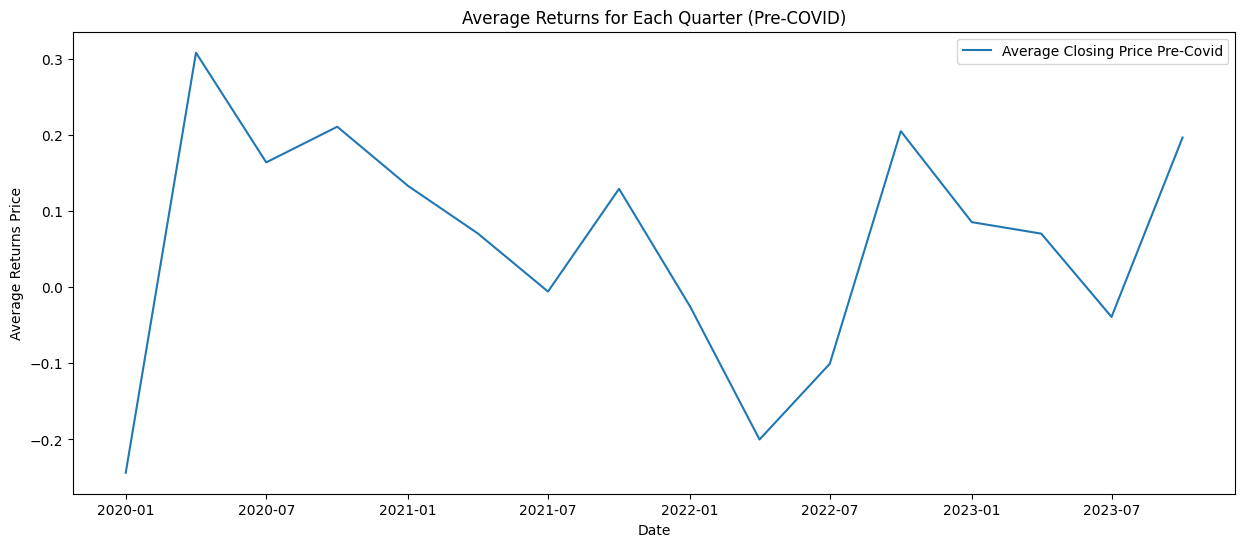

In [391]:
average_returns_post_covid = quarterly_values[quarterly_values['Post-covid'] == 1].groupby('date')['quarterly_returns'].mean()
average_attention_post_covid = quarterly_values[quarterly_values['Post-covid'] == 1].groupby('date')['quarterly_attention'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Closing Price Pre-Covid')
plt.title('Average Returns for Each Quarter (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns Price')
plt.legend()
plt.show()

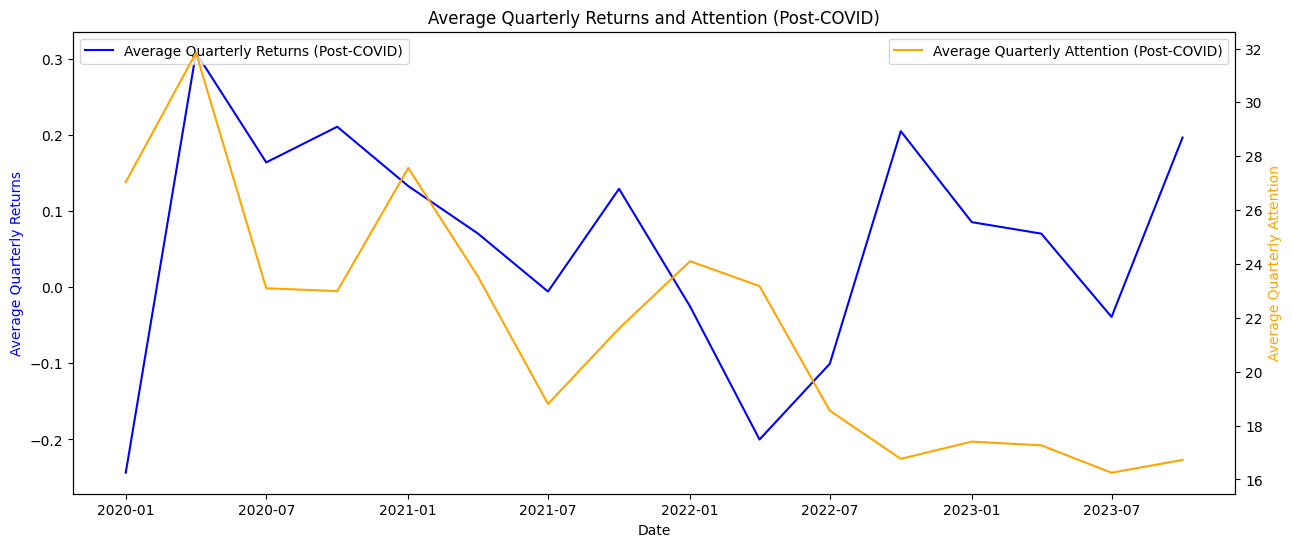

In [393]:
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Quarterly Returns (Post-COVID)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Quarterly Returns', color='blue')

# Create a secondary y-axis for average quarterly attention
ax2 = ax1.twinx()
ax2.plot(average_attention_post_covid.index, average_attention_post_covid, label='Average Quarterly Attention (Post-COVID)', color='orange')
ax2.set_ylabel('Average Quarterly Attention', color='orange')

# Add title and legend
plt.title('Average Quarterly Returns and Attention (Post-COVID)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

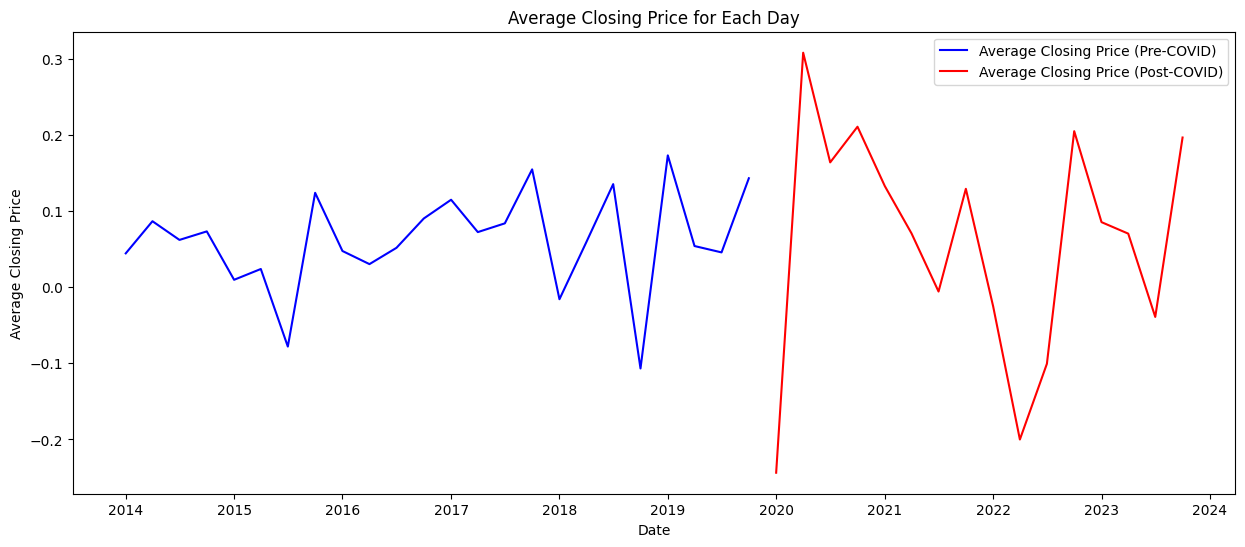

In [354]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_closing_prices_pre_covid.index, average_closing_prices_pre_covid, label='Average Closing Price (Pre-COVID)', color='blue')
plt.plot(average_closing_prices_post_covid.index, average_closing_prices_post_covid, label='Average Closing Price (Post-COVID)', color='red')
plt.title('Average Closing Price for Each Quarter')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


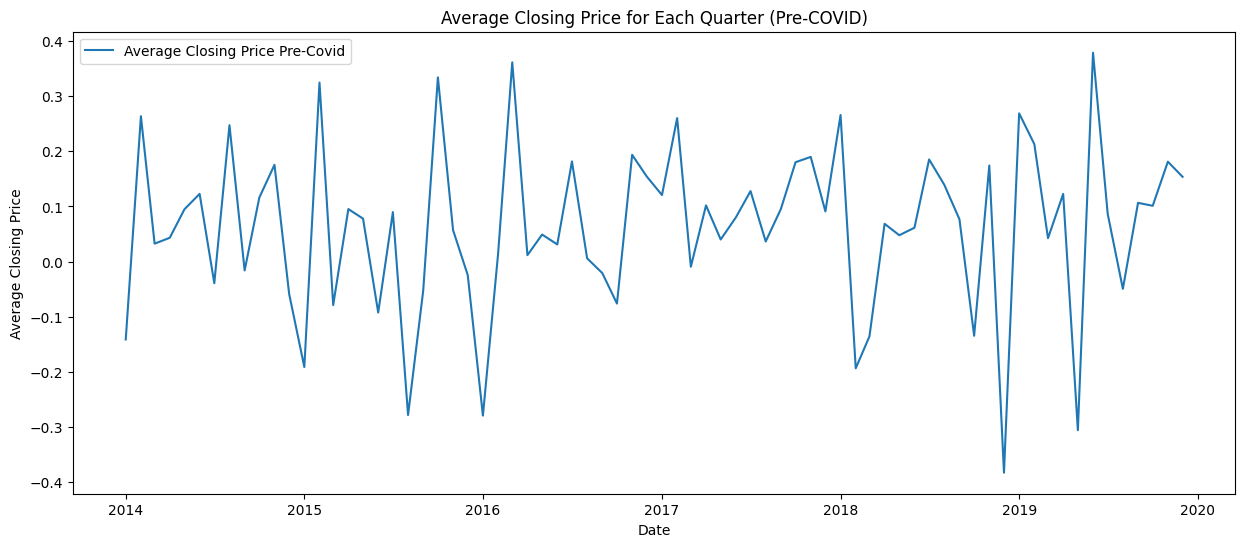

In [355]:
average_returns_pre_covid = monthly_values[monthly_values['Pre-covid'] == 1].groupby('date')['monthly_returns'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns Pre-Covid')
plt.title('Average Returns for Each Quarter (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

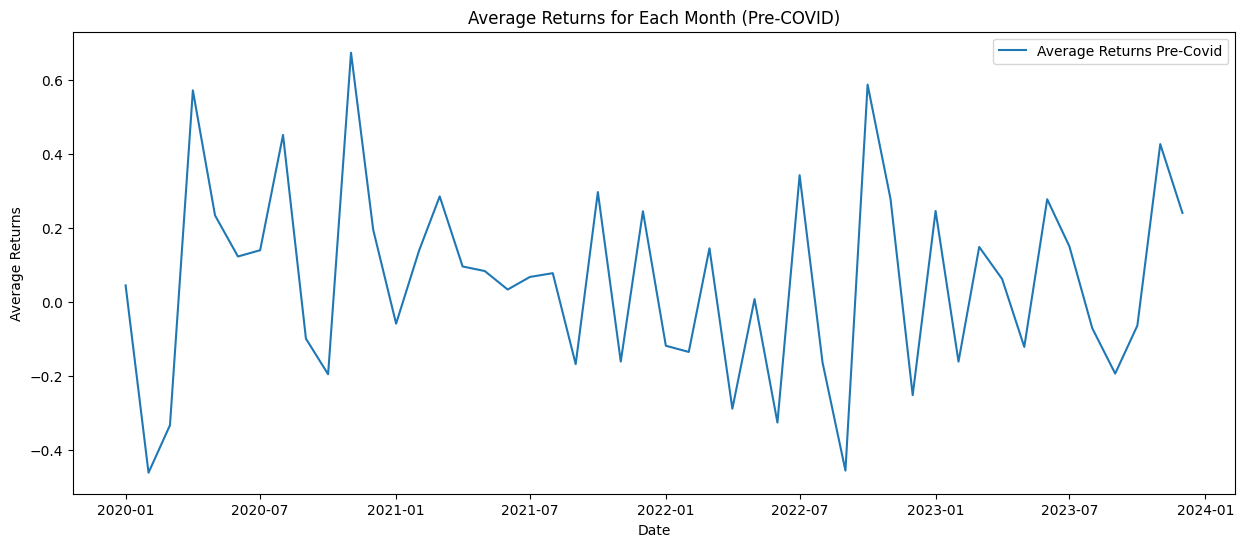

In [394]:
average_returns_post_covid = monthly_values[monthly_values['Post-covid'] == 1].groupby('date')['monthly_returns'].mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns Pre-Covid')
plt.title('Average Returns for Each Month (Pre-COVID)')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

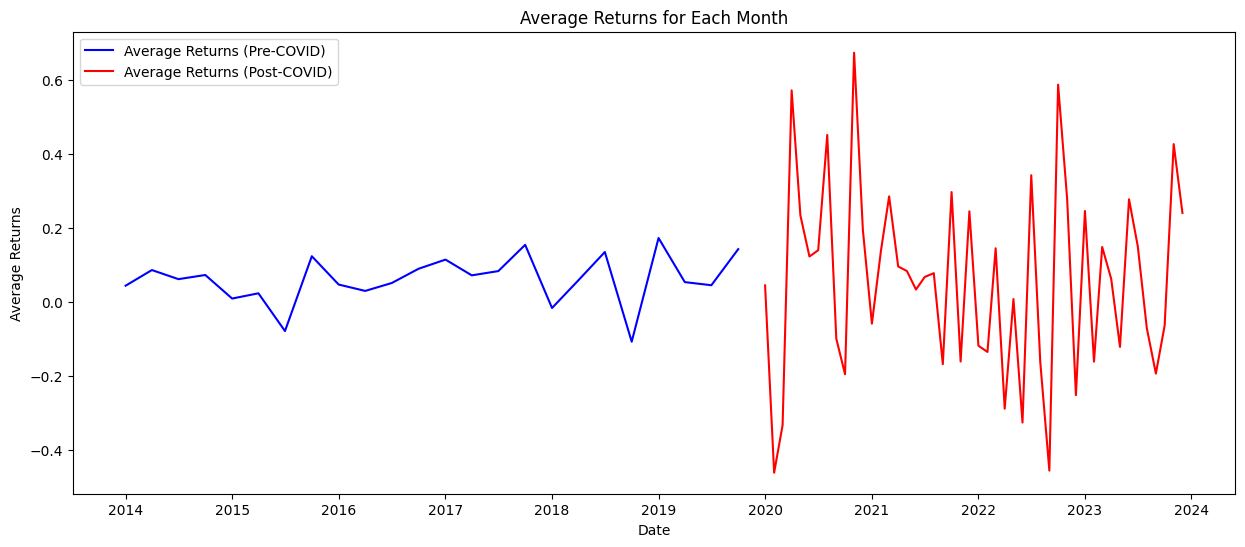

In [396]:
# Plotting
plt.figure(figsize=(15, 6))
plt.plot(average_returns_pre_covid.index, average_returns_pre_covid, label='Average Returns (Pre-COVID)', color='blue')
plt.plot(average_returns_post_covid.index, average_returns_post_covid, label='Average Returns (Post-COVID)', color='red')
plt.title('Average Returns for Each Month')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.legend()
plt.show()
